In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action="ignore")

## Airline Satisfaction

In [2]:
df = pd.read_excel("airlineSatisfactionData.xlsx")

In [25]:
df_ = df.copy()

In [26]:
df.shape

(103904, 24)

In [27]:
df.head()

,ID,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,NPS
0,1,Male,48,Business travel,Business,821,2,5.00000,3,4,3,4,4,4,5,5,3,3,5,5,5,5,4,5
1,2,Female,35,Business travel,Business,821,26,39.00000,2,3,2,3,4,5,4,5,5,5,5,4,5,5,4,8
2,3,Male,41,Business travel,Business,853,0,0.00000,5,5,4,5,4,5,5,5,3,4,3,5,3,5,4,9
3,4,Male,50,Personal Travel,Business,1905,0,0.00000,1,3,2,3,4,5,5,5,5,5,5,4,5,5,3,9
4,5,Female,49,Business travel,Business,3470,0,1.00000,3,4,3,4,4,5,4,5,3,5,3,4,3,5,4,8


In [3]:
df.index

RangeIndex(start=0, stop=103904, step=1)

In [4]:
df['Inflight entertainment'].value_counts()

5    64205
3    28047
4     9570
2     2082
Name: Inflight entertainment, dtype: int64

In [5]:
df.columns

Index(['ID', 'Gender', 'Age', 'Type of Travel', 'Class', 'Flight Distance',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction',
       'NPS'],
      dtype='object')

In [6]:
target_columns = ['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction']

In [7]:
for col in target_columns:
    df[col][df[col]==1] = 0
    df[col][df[col]==2] = 20
    df[col][df[col]==3] = 50
    df[col][df[col]==4] = 80
    df[col][df[col]==5] = 100
df.head()

,ID,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,NPS
0,1,Male,48,Business travel,Business,821,2,5.00000,50,80,50,80,80,80,100,100,50,50,100,100,100,100,80,5
1,2,Female,35,Business travel,Business,821,26,39.00000,20,50,20,50,80,100,80,100,100,100,100,80,100,100,80,8
2,3,Male,41,Business travel,Business,853,0,0.00000,100,100,80,100,80,100,100,100,50,80,50,100,50,100,80,9
3,4,Male,50,Personal Travel,Business,1905,0,0.00000,0,50,20,50,80,100,100,100,100,100,100,80,100,100,50,9
4,5,Female,49,Business travel,Business,3470,0,1.00000,50,80,50,80,80,100,80,100,50,100,50,80,50,100,80,8


In [8]:
df['Inflight entertainment'].value_counts()

100    64205
50     28047
80      9570
20      2082
Name: Inflight entertainment, dtype: int64

In [9]:
df.head()

,ID,Gender,Age,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,NPS
0,1,Male,48,Business travel,Business,821,2,5.00000,50,80,50,80,80,80,100,100,50,50,100,100,100,100,80,5
1,2,Female,35,Business travel,Business,821,26,39.00000,20,50,20,50,80,100,80,100,100,100,100,80,100,100,80,8
2,3,Male,41,Business travel,Business,853,0,0.00000,100,100,80,100,80,100,100,100,50,80,50,100,50,100,80,9
3,4,Male,50,Personal Travel,Business,1905,0,0.00000,0,50,20,50,80,100,100,100,100,100,100,80,100,100,50,9
4,5,Female,49,Business travel,Business,3470,0,1.00000,50,80,50,80,80,100,80,100,50,100,50,80,50,100,80,8


In [10]:
df[target_columns].head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,50,80,50,80,80,80,100,100,50,50,100,100,100,100,80
1,20,50,20,50,80,100,80,100,100,100,100,80,100,100,80
2,100,100,80,100,80,100,100,100,50,80,50,100,50,100,80
3,0,50,20,50,80,100,100,100,100,100,100,80,100,100,50
4,50,80,50,80,80,100,80,100,50,100,50,80,50,100,80


In [11]:
df[target_columns].corr()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
Inflight wifi service,1.00000,0.32877,0.68175,0.28897,0.53066,0.47288,0.13115,0.21518,0.12645,0.16926,0.12190,0.04534,0.11068,0.14009,0.73406
Departure/Arrival time convenient,0.32877,1.00000,0.45034,0.44880,0.29827,0.07472,0.00320,-0.01151,0.06121,0.01082,0.07055,0.08476,0.07050,0.00845,0.33434
Ease of Online booking,0.68175,0.45034,1.00000,0.42576,0.38893,0.41387,0.03176,0.04056,0.03819,0.10580,0.03598,0.01755,0.03283,0.01951,0.54860
Gate location,0.28897,0.44880,0.42576,1.00000,0.17486,-0.01984,-0.01341,-0.00870,-0.04970,-0.02369,-0.00337,-0.04786,-0.00266,-0.01542,0.28162
Food and drink,0.53066,0.29827,0.38893,0.17486,1.00000,0.37490,0.34426,0.46279,0.48310,0.35505,0.48763,0.30116,0.62573,0.35096,0.72873
Online boarding,0.47288,0.07472,0.41387,-0.01984,0.37490,1.00000,0.40000,0.23837,0.12486,0.09328,0.05485,0.17369,0.04508,0.31626,0.43206
Seat comfort,0.13115,0.00320,0.03176,-0.01341,0.34426,0.40000,1.00000,0.56187,0.13272,0.10305,0.07211,0.18736,0.06630,0.67343,0.34048
Inflight entertainment,0.21518,-0.01151,0.04056,-0.00870,0.46279,0.23837,0.56187,1.00000,0.36569,0.26132,0.33017,0.09438,0.34942,0.65636,0.37422
On-board service,0.12645,0.06121,0.03819,-0.04970,0.48310,0.12486,0.13272,0.36569,1.00000,0.33638,0.51818,0.23567,0.54927,0.11842,0.31360
Leg room service,0.16926,0.01082,0.10580,-0.02369,0.35505,0.09328,0.10305,0.26132,0.33638,1.00000,0.35062,0.14939,0.34399,0.08700,0.26849


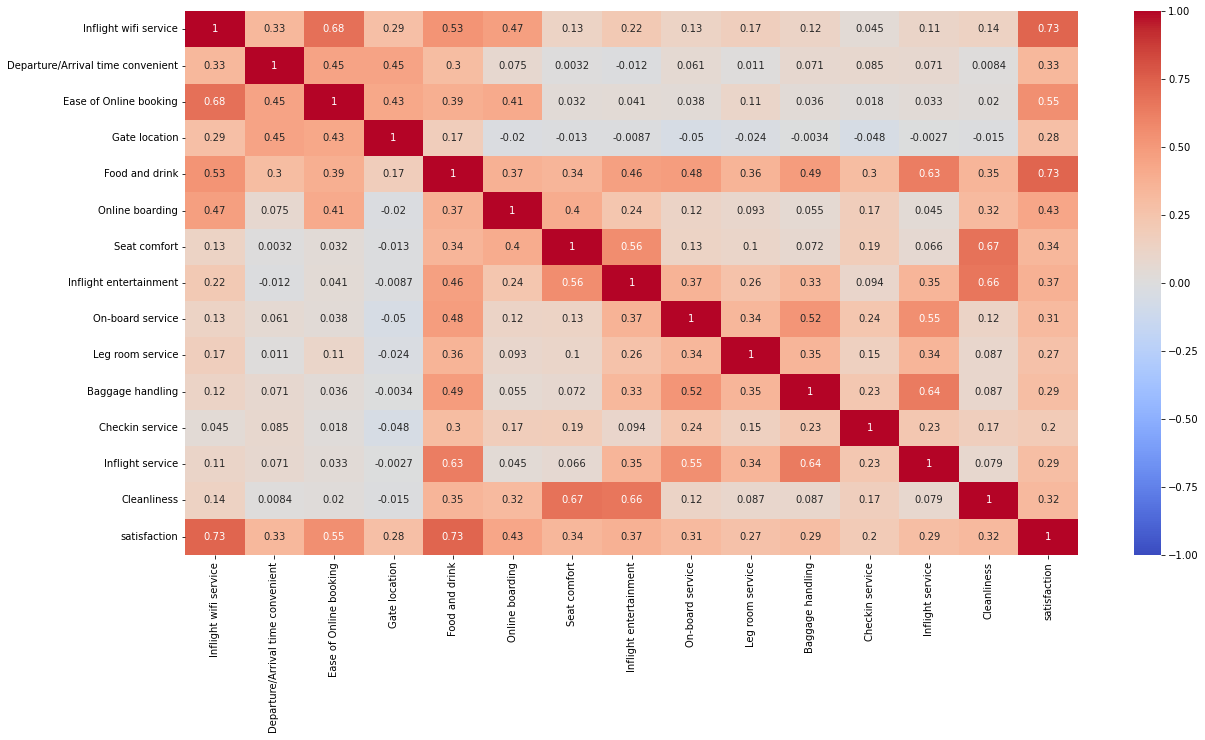

In [12]:
plt.figure(figsize=(20, 10))
sns.heatmap(df[target_columns].corr(), vmin=-1, vmax=1, annot=True, cmap='coolwarm');

In [13]:
df_corr= df[target_columns].corr()

In [14]:
df_corr.head()

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
Inflight wifi service,1.00000,0.32877,0.68175,0.28897,0.53066,0.47288,0.13115,0.21518,0.12645,0.16926,0.12190,0.04534,0.11068,0.14009,0.73406
Departure/Arrival time convenient,0.32877,1.00000,0.45034,0.44880,0.29827,0.07472,0.00320,-0.01151,0.06121,0.01082,0.07055,0.08476,0.07050,0.00845,0.33434
Ease of Online booking,0.68175,0.45034,1.00000,0.42576,0.38893,0.41387,0.03176,0.04056,0.03819,0.10580,0.03598,0.01755,0.03283,0.01951,0.54860
Gate location,0.28897,0.44880,0.42576,1.00000,0.17486,-0.01984,-0.01341,-0.00870,-0.04970,-0.02369,-0.00337,-0.04786,-0.00266,-0.01542,0.28162
Food and drink,0.53066,0.29827,0.38893,0.17486,1.00000,0.37490,0.34426,0.46279,0.48310,0.35505,0.48763,0.30116,0.62573,0.35096,0.72873


In [15]:
df_final = df_corr[["satisfaction"]]

In [16]:
df_final.head(20)

,satisfaction
Inflight wifi service,0.73406
Departure/Arrival time convenient,0.33434
Ease of Online booking,0.54860
Gate location,0.28162
Food and drink,0.72873
Online boarding,0.43206
Seat comfort,0.34048
Inflight entertainment,0.37422
On-board service,0.31360
Leg room service,0.26849


In [17]:
df_final.columns

Index(['satisfaction'], dtype='object')

In [18]:
df_final.columns =  ["Importance"]
df_final.head()

,Importance
Inflight wifi service,0.73406
Departure/Arrival time convenient,0.33434
Ease of Online booking,0.54860
Gate location,0.28162
Food and drink,0.72873


In [19]:
pd.DataFrame({"Satisfaction": df[target_columns].mean(), "Service Quality": df[target_columns].std()})

,Satisfaction,Service Quality
Inflight wifi service,43.11730,38.45729
Departure/Arrival time convenient,72.25602,31.52985
Ease of Online booking,44.78798,34.83276
Gate location,71.61293,29.22654
Food and drink,62.00397,20.36559
Online boarding,77.27778,28.23048
Seat comfort,61.79685,34.53212
Inflight entertainment,83.05830,23.51376
On-board service,60.33868,33.79881
Leg room service,78.40112,27.33900


In [20]:
df_2 = pd.DataFrame({"Satisfaction": df[target_columns].mean(), "Service Quality": df[target_columns].std()})

In [21]:
df_2["Ratio"] = df_2["Service Quality"] / df_2["Satisfaction"]

In [22]:
df_2.head()

,Satisfaction,Service Quality,Ratio
Inflight wifi service,43.11730,38.45729,0.89192
Departure/Arrival time convenient,72.25602,31.52985,0.43636
Ease of Online booking,44.78798,34.83276,0.77773
Gate location,71.61293,29.22654,0.40812
Food and drink,62.00397,20.36559,0.32846


In [23]:
df_final = df_final.join(df_2)

In [25]:
df_final.head(20)

,Importance,Satisfaction,Service Quality,Ratio
Inflight wifi service,0.73406,43.11730,38.45729,0.89192
Departure/Arrival time convenient,0.33434,72.25602,31.52985,0.43636
Ease of Online booking,0.54860,44.78798,34.83276,0.77773
Gate location,0.28162,71.61293,29.22654,0.40812
Food and drink,0.72873,62.00397,20.36559,0.32846
Online boarding,0.43206,77.27778,28.23048,0.36531
Seat comfort,0.34048,61.79685,34.53212,0.55880
Inflight entertainment,0.37422,83.05830,23.51376,0.28310
On-board service,0.31360,60.33868,33.79881,0.56015
Leg room service,0.26849,78.40112,27.33900,0.34871


In [26]:
import matplotlib.pyplot as plt

In [32]:
df_final.index

Index(['Inflight wifi service', 'Departure/Arrival time convenient',
       'Ease of Online booking', 'Gate location', 'Food and drink',
       'Online boarding', 'Seat comfort', 'Inflight entertainment',
       'On-board service', 'Leg room service', 'Baggage handling',
       'Checkin service', 'Inflight service', 'Cleanliness', 'satisfaction'],
      dtype='object')

In [33]:
target_columns_abv = ['IWS', 'DAC',
       'OBO', 'GL', 'FD',
       'OBR', 'SC', 'IE',
       'OBS', 'LRS', 'BH',
       'CS', 'IS', 'CLS', 'STS']

In [34]:
df_final["Importance"]

Inflight wifi service               0.73406
Departure/Arrival time convenient   0.33434
Ease of Online booking              0.54860
Gate location                       0.28162
Food and drink                      0.72873
Online boarding                     0.43206
Seat comfort                        0.34048
Inflight entertainment              0.37422
On-board service                    0.31360
Leg room service                    0.26849
Baggage handling                    0.29155
Checkin service                     0.20258
Inflight service                    0.29083
Cleanliness                         0.32052
satisfaction                        1.00000
Name: Importance, dtype: float64

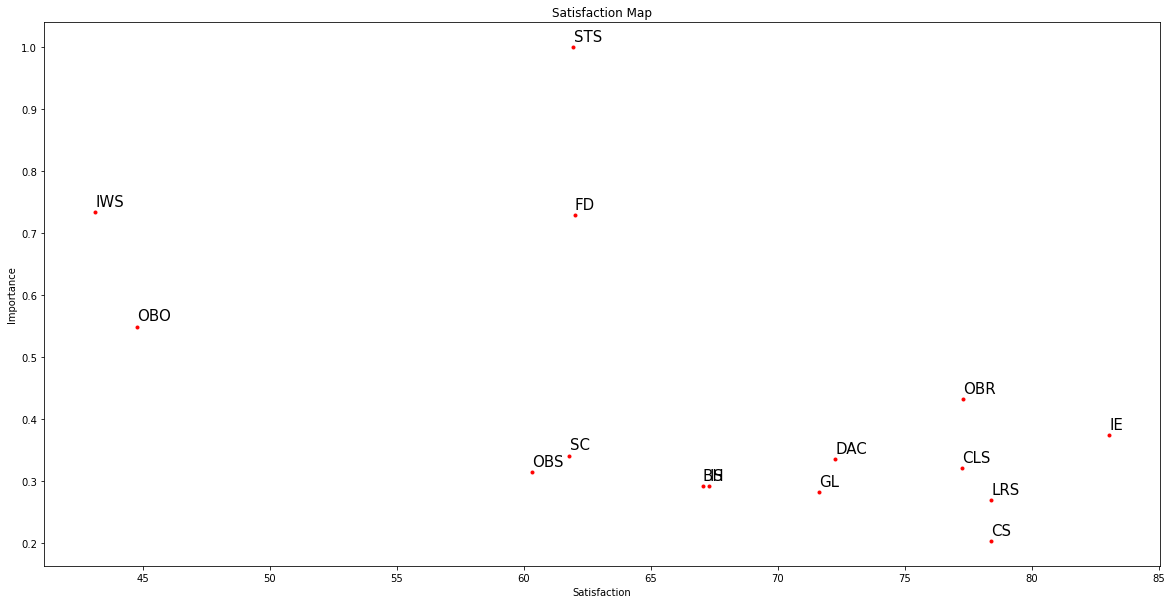

In [35]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

types = target_columns_abv
x_coords = df_final["Satisfaction"]
y_coords = df_final["Importance"]

plt.title("Satisfaction Map")
plt.xlabel("Satisfaction")
plt.ylabel("Importance")


for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='.', color='red')
    plt.text(x+0.01, y+0.01, type, fontsize=15)
    
    
plt.show()

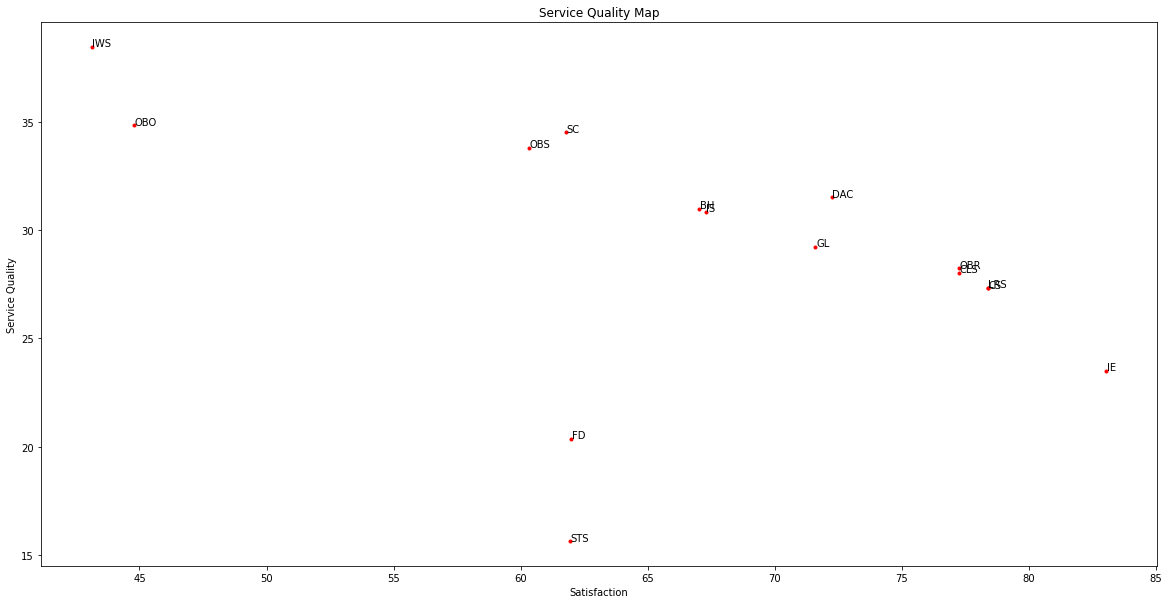

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))

# simulating a pandas df['type'] column
types = target_columns_abv
x_coords = df_final["Satisfaction"]
y_coords = df_final["Service Quality"]

plt.title("Service Quality Map")
plt.xlabel("Satisfaction")
plt.ylabel("Service Quality")


for i,type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='.', color='red')
    plt.text(x+0.02, y+0.02, type, fontsize=10)
plt.show()